In [1]:
from __future__ import division
import numpy as np
import pickle
import Cosmology as Cosmo
import matplotlib.pyplot as plt

In [2]:
params  = Cosmo.Planck2015
tag     = params[0]['name']
field   = 'eb'
nl      = True
div     = False

In [3]:
thetaFWHMarcmin = 1. #beam FWHM
noiseUkArcmin   = 1. #eval(sys.argv[1]) #Noise level in uKarcmin
l_max_T         = 3000
l_max_P         = 5000
l_min           = 50
L_max           = 6000 #for l integration
L_min           = 1
TCMB            = 2.7255e6
div             = False #divide EB by factor of 2.5
exp             = 'CMB-S4'

len_ang         = 400
len_l           = 4608


if l_max_T!=l_max_P:
    lmax='mixedlmax_%d_%d'%(l_max_T,l_max_P)
else:
    lmax=str(l_max_T)

if nl:
  nl_='_nl'
else:
  nl_=''

if div:
    print 'Dividing EB by factor 2.5!'
    no_div='div25'
else:
    no_div='nodiv'

biaspath = '/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/biasResults/Cross/kkg/lmin%d_lmax%d_noise%d_theta%d/'%(l_min,l_max_T,noiseUkArcmin,thetaFWHMarcmin*10)
ALpath   = './outputs/N0files/'
outputpath = '/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/outputs/CrossBias/kkg/'
plotpath = '/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/biasResults/Cross/plots/'

In [4]:
ellpath="/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/outputs/ells/"
L,l,theta = pickle.load(open(ellpath+'ell_ang_full_Lmin1_Lmax3000_lmin1_lmax8000_lenL120_lenl140_lenang120_1e-04.pkl','r'))
path='/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/outputs/power_spectra/'
noisepath='/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/outputs/noise_curves/'
zmin=[0,0.5,1,2,3,0]
zmax=[0.5,1,2,3,4,'$z_{cmb}$']
ngal =[14.3,23.9,21.6,3.7,1.5,65.7]

In [7]:
from scipy.interpolate import interp1d
bias=[]
cls=[]
noise=[]
bins= ['all']
LL = np.arange(100,2999)
for LSST_bin in bins:
    Ls, bias_ = pickle.load(open(biaspath+'TotbiasEB_%d_%d_%s.pkl'%(len_ang,len_l,str(LSST_bin))))
    bias_    = interp1d(Ls,bias_,kind='cubic')
    filename = ALpath+'%s_N0_%s_%d_%d%d_%s%s.pkl'%(tag,lmax,l_min,10*noiseUkArcmin,10*thetaFWHMarcmin,no_div,nl_)
    LA,NL_KK = pickle.load(open(filename,'r'))
    AL       = np.interp(LL,LA,NL_KK['tt'])
    bias     +=[1/2.*LL**2*AL*bias_(LL)]
    cl       =np.load(path+'CL_kg_LSSTbin%s_full_Planck2015_Lmin1-Lmax2999_halofit.npy'%str(LSST_bin))
    ll,_,_,_,noise_gg,noise_kg,noise_kk = pickle.load(open(noisepath+'Gaussian_variances_%s_%s_%s_LSSTbin%s_full_%s_%s.pkl'%(field,exp,lmax,str(LSST_bin),tag,'dndz_LSST_i27_SN5_3y'),'r'))
    cls      +=[np.interp(LL,L,cl)]
    noise    +=[np.interp(LL,ll,noise_kg)]
pickle.dump([bins,LL,bias,noise,cls],open(outputpath+'N32biasEB_%s_%d_%d_%d_%d.pkl'%(tag,thetaFWHMarcmin,noiseUkArcmin,l_min,l_max_T),'w'))

bin all
tot S/N 489.089905302
tot bias/noise 58.0060179453


IndexError: list index out of range

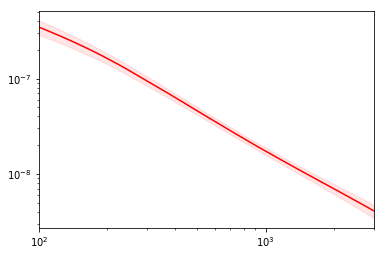

In [8]:
#plt.style.use('classic')
lmin=500
lmax=3000
colors=['r','b','g','c','orange','black']
plt.figure()
for ii in [0,1,2,3,4,5]:
 
    plt.loglog(LL,cls[ii],c=colors[ii])
    plt.fill_between(LL,cls[ii]-noise[ii],cls[ii]+noise[ii],color=colors[ii],alpha=0.1)
    plt.xlim(100,3000)
    print 'bin', bins[ii]
    print 'tot S/N', np.sqrt(np.sum((cls[ii]/noise[ii])**2))
    print 'tot bias/noise', np.sqrt(np.sum((bias[ii]/noise[ii])**2))

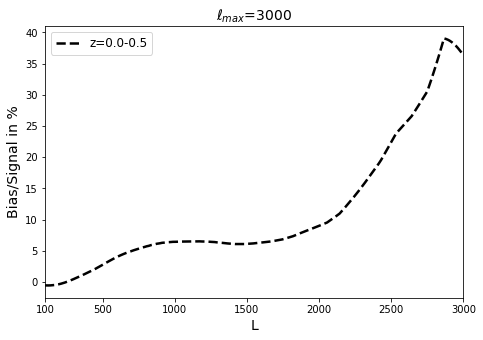

In [10]:
#plt.style.use(['seaborn-colorblind','paper'])
plt.figure(figsize=(7.5,5))
ii=0
plt.plot(LL,bias[ii]/cls[ii]*100,lw=2.5,ls='--',c='black',label='z=%.1f-%s'%(zmin[ii],str(zmax[ii])))
#for ii in np.arange(len(bins)-1):
#    plt.plot(LL,bias[ii]/cls[ii]*100,lw=2,label='z=%.1f-%s'%(zmin[ii],str(zmax[ii])))
plt.xlabel('L',fontsize=14)
plt.title('$\ell_{max}$=%d'%l_max_T,fontsize=14)
plt.ylabel('Bias/Signal in %',fontsize=14)
plt.legend(fontsize=12)
plt.xlim(100,3000)
plt.xticks([100,500,1000,1500,2000,2500,3000])
plt.savefig(plotpath+'Bias_over_Signal_EB_LSST_lmax%d.pdf'%l_max_T,bbox_inches='tight')
plt.show()

In [11]:
# binning
deltaL= 100
binned_bias=[]
binned_noise=[]
for ii in np.arange(len(bins)):
    inc = 0
    res =[]
    res2=[]
    L_=[]
    while inc<max(LL):
        res+=[np.mean(bias[ii][inc:inc+deltaL])]
        res2+=[np.mean(noise[ii][inc:inc+deltaL])]
        inc+=deltaL
        L_+=[np.mean(LL[inc:inc+deltaL])]
    binned_bias+=[np.asarray(res)]
    binned_noise+=[np.asarray(res2)]


/home/nessa/miniconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/nessa/miniconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


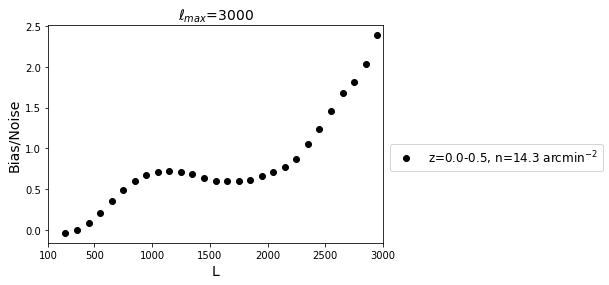

In [12]:
plt.figure()
ii=0
plt.plot(L_,binned_bias[ii]/binned_noise[ii],lw=2.5,ls ='',marker='o',c='black',label='z=%.1f-%s, n=%.1f arcmin$^{-2}$'%(zmin[ii],str(zmax[ii]),ngal[ii]))
#for ii in np.arange(len(bins)-1):
#    plt.plot(L_,binned_bias[ii]/binned_noise[ii],ls ='',marker='o',label='z=%.1f-%.1f, n=%.1f arcmin$^{-2}$'%(zmin[bins[ii]],zmax[bins[ii]],ngal[bins[ii]]))
plt.title('$\ell_{max}$=%d'%l_max_T,fontsize=14)
plt.legend(fontsize=12,loc=(1.02,0.33))
plt.ylabel('Bias/Noise',fontsize=14)
plt.xlabel('L',fontsize=14)
plt.xlim(100,3000)
plt.xticks([100,500,1000,1500,2000,2500,3000])
plt.savefig(plotpath+'Bias_over_Noise_EB_LSST_lmax%d.pdf'%l_max_T,bbox_inches='tight')